In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage
from sklearn import linear_model, datasets, metrics, model_selection, neural_network, pipeline

In [12]:
#setting up
def nudge_dataset(X, Y):
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]
    shift = lambda x, w: ndimage.convolve(x.reshape((8,8)), mode='constant', weights=w).ravel()
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis = 0)
    return X, Y

In [13]:
#Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) /(np.max(X, 0) + 0.0001) #0-1 scaling

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

logistic = linear_model.LogisticRegression()
rbm = neural_network.BernoulliRBM(random_state=0, verbose=True)
classifier = pipeline.Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

ValueError: cannot reshape array of size 64 into shape (64,64)

In [5]:
rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 100
logistic.C = 6000.0
classifier.fit(X_train, Y_train)

logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.42s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.64s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.60s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.59s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.59s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.62s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.59s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.58s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.59s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.60s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.58s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.60s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.59s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.62s
[BernoulliRBM] Iteration 15, 

/home/arthur.xw/.local/share/virtualenvs/ml-FhzBcel1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arthur.xw/.local/share/virtualenvs/ml-FhzBcel1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/arthur.xw/.local/share/virtualenvs/ml-FhzBcel1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arthur.xw/.local/share/virtualenvs/ml-FhzBcel1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence th

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, classifier.predict(X_test))))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       174
           1       0.92      0.95      0.93       184
           2       0.95      0.98      0.97       166
           3       0.97      0.91      0.94       194
           4       0.97      0.95      0.96       186
           5       0.93      0.93      0.93       181
           6       0.98      0.97      0.97       207
           7       0.95      1.00      0.97       154
           8       0.90      0.88      0.89       182
           9       0.91      0.93      0.92       169

   micro avg       0.95      0.95      0.95      1797
   macro avg       0.95      0.95      0.95      1797
weighted avg       0.95      0.95      0.95      1797




In [7]:
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, logistic_classifier.predict(X_test))))

Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       174
           1       0.57      0.55      0.56       184
           2       0.72      0.85      0.78       166
           3       0.76      0.74      0.75       194
           4       0.85      0.82      0.84       186
           5       0.74      0.75      0.75       181
           6       0.93      0.88      0.91       207
           7       0.86      0.90      0.88       154
           8       0.68      0.55      0.61       182
           9       0.71      0.74      0.72       169

   micro avg       0.77      0.77      0.77      1797
   macro avg       0.77      0.77      0.77      1797
weighted avg       0.77      0.77      0.77      1797




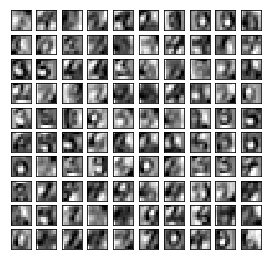

In [9]:
#Plotting
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape((32, 32)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()